# Optimization in $\mathbb{R}^n$

## 1. Notions & Notation

An **optimization problem** in $\mathbb{R}^n$ is one where the values of a given function $f: \mathbb{R}^n \to \mathbb{R}$ are to be maximized or minimized over a given set $\mathcal{D} \subset \mathbb{R}^n$.

- $f$ is the **objective function**
- $\mathcal{D}$ is the **constraint set**

Some optimization problems are presented in **parametric form**, where the objective function and/or the feasible set depend on the value of a parameter $\theta$. 

- $\Theta$ is the set of all parameters of interest
- Given a particular $\theta \in \Theta$, the objective function and feasible set of an optimization problem under $\theta$ is denoted $f(\cdot, \theta)$ and $\mathcal{D}(\theta)$, respectively.
- $\mathcal{D}^\ast(\theta)$ denotes the set $$\mathcal{D}^\ast(\theta) = \arg \max \{f(x, \theta) \mid x \in \mathcal{D}(\theta)\} = \{x \in \mathcal{D}(\theta) \mid f(x \theta) \geq f(z, \theta) \text{ for all } z \in \mathcal{D}(\theta)\}.$$ Similarly, $\mathcal{D}_\ast(\theta)$ dentoes the set of minimizers of $f(\cdot, \theta)$ on $\mathcal{D}(\theta)$. 

Abbreviations for inf and sup:
- $f^\ast(\theta) = \sup f(\mathcal{D}(\theta))$ - called the **maximized value function** of the problem $\max \{f(x, \theta) \mid x \in \mathcal{D}(\theta)\}$
- $f_\ast(\theta) = \inf f(\mathcal{D}(\theta))$ - called the **minimized value function** of the problem $\min \{f(x, \theta) \mid x \in \mathcal{D}(\theta)\}$

## 2. Examples of Optimization Problems

### 2.1 - Utility Maximization

Consider a single agent who consumes $n$ commodities in nonnegative quantities like a gluttonous slob (nobody is going to read this, so I can make as many jokes as I want (: ).
- Her **utility** from consuming $x_i \geq 0$ units of commodity $i$ ($i = 1:n$) is given by the **utility function** $u: \mathbb{R}_+^n \to \mathbb{R}$, where $$u = u(x_1, \dots, x_n).$$

- Agent has an **income** $I \geq 0$
- Agent faces the **price vector** $p = (p_1, \dots, p_n)$, where $p_i \geq 0$ denotes the unit price of the $i$-th commodity.
- Agent has a **budget set** (set of affordable consumption bundles, given income $I$, prices $p$), denoted by $\mathcal{B}(p, I)$ and is given by $$\mathcal{B}(p, I) = \{x \in \mathbb{R}_+^n \mid p \cdot x \leq I\}.$$


The **objective** is to **maximize utility** $u$ over the set of affordable commodity bundles: $$\text{Maximize }u(x) \text{ subject to } x \in \mathcal{B}(p, I).$$ 

Sometimes, $p$ and $I$ may not be the only or even primary parameters of interest. 
- Sometimes we may restrict the utility function to being in the **Cobb-Douglas class**: $$u(x_1, \dots, x_n) = x_1^{a_1} \cdots x_n^{a_n}, \qquad a_i > 0 \text{ for all } i.$$
- The objective examines how the solutions to the problem change as the vector of "weights" $a = (a_1, \dots, a_n)$ changes, for a *given* level of prices and income, so that $a$ is the only parameter of interest.  

#### Example 1 - **Leontief utility**

> Maximize $u(x_1, x_2) = \min(x_1, 2x_2)$ subject to $4x_1 + x_2 \leq 20,$ where $ x_1 \geq 0, x_2 \geq 0$.  

- This is an example using a Leontief utility function, which is a utility function involving taking the minimum over the weighted set of commodities. These typically represent complementary goods. Think of $x_1$ as bread and $x_2$ as cheese, which may be consumed in a 2:1 ratio. 

We can visualize the function $u$ and the domain $\mathcal{D}$ below:

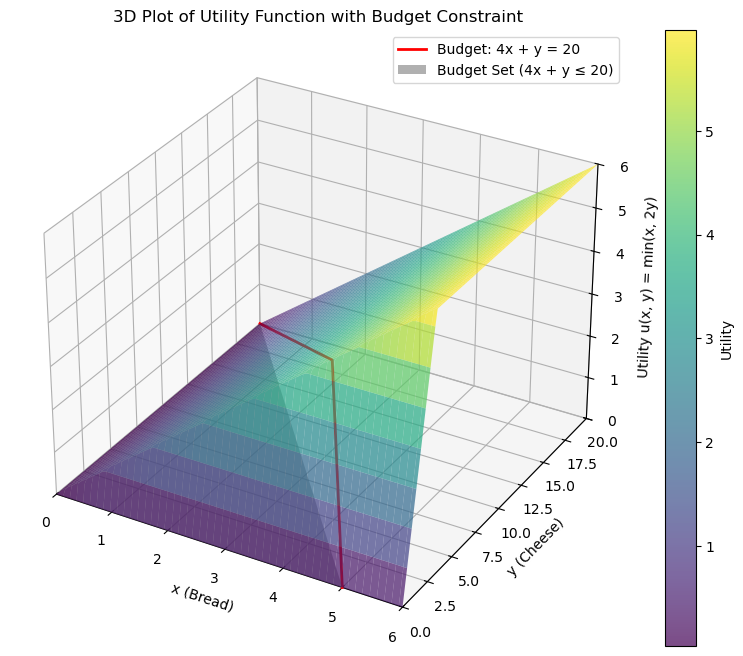

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the utility function
def u(x, y):
    return np.minimum(x, 2*y)

# Create grid for plotting
x = np.linspace(0, 6, 100)
y = np.linspace(0, 20, 100)
X, Y = np.meshgrid(x, y)

# Compute utility values
Z = u(X, Y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# Add budget constraint line
x_budget = np.linspace(0, 5, 100)
y_budget = 20 - 4*x_budget
ax.plot(x_budget, y_budget, u(x_budget, y_budget), 'r-', linewidth=2, label='Budget: 4x + y = 20')

# Create mesh for budget set (4x + y <= 20)
x_tri = np.array([0, 5, 0])
y_tri = np.array([0, 0, 20])
z_tri = np.array([0, 0, 0])
ax.plot_trisurf(x_tri, y_tri, z_tri, color='gray', alpha=0.5, label='Budget Set (4x + y ≤ 20)')

# Labels and title
ax.set_xlabel('x (Bread)')
ax.set_ylabel('y (Cheese)')
ax.set_zlabel('Utility u(x, y) = min(x, 2y)')
ax.set_title('3D Plot of Utility Function with Budget Constraint')
fig.colorbar(surface, label='Utility')
ax.legend()
ax.set_xlim(0, 6)
ax.set_ylim(0, 20)
ax.set_zlim(0, 6)
plt.show()

This is pretty straightforward to solve analytically. The utility function $u$ is increasing in both $x_1$ and $x_2$, so we should find a solution furthest from the origin in constraint set and the first quadrant. Since 1 and 2 are complementary commodities, we let $x_1 = 2x_2$ and substitute onto the budget line equation $4x_1 + x_2 = 20$: $$8x_2 + x_2 = 20 \implies 9x_2 = 20 \implies x_2 = \frac{20}{9} \approx 2.22, x_1 = \frac{40}{9} \approx 4.44.$$ The point (4.44, 2.22) is visible in the plot above. 

Instead of solving analytically, we can use `scipy.optimize` in Python.

Optimal (x_1, x_2): 4.44, 2.22
Maximum utility: 4.44


#### Example 2 - **Cobb-Douglas utility**

> Maximize $u(x_1, x_2) = x_1^{0.25} x_2^{0.5}$ subject to the budget constraint $2x + 4y = 90$. 

Compute the marginal utility functions:

$$\frac{\partial u}{\partial x_1} = 0.25 x_1^{-0.75}x_2^{0.5}, \qquad \frac{\partial u}{\partial x_2} = 0.5 x_1^{0.25}x_2^{-0.5}.$$

For Cobb-Douglas utility, we compute the **marginal rate of substitution**: $$\mathrm{MRS} = \frac{u_{x_1}}{u_{x_2}} = \frac{0.25}{0.5} x_1^{-1} x_2 = \frac{x_2}{2x_1}.$$ 

We set the marginal rate of substitution equal to the "price ratio", which in this case is $2/4 = 0.5$, so that $$\frac{1}{2} = \frac{x_2}{2x_1} \implies \frac{x_2}{x_1} = 1.$$

This relationship must hold at the utility maximizing point, therefore, $$2x_1 + 4x_2 = 90 \implies 6x_1 = 90 \implies x_1 = 15, x_2 = 15.$$

Alternatively, using `scipy`, we have,

In [14]:
import numpy as np
from scipy.optimize import minimize

# Objective function: x1^0.25 * x2^0.5
def objective(x):
    return -(x[0]**0.25 * x[1]**0.5)  # Negative for minimization

# Constraint: 2x1 + 4x2 = 90
def constraint(x):
    return 2*x[0] + 4*x[1] - 90

# Initial guess
x0 = [10, 20]

# Constraints dictionary
cons = {'type': 'eq', 'fun': constraint}

# Bounds (x1, x2 >= 0)
bnds = ((0, None), (0, None))

# Minimize
result = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)

# Output result
if result.success:
    print(f"Optimal x1: {result.x[0]:.4f}, x2: {result.x[1]:.4f}")
    print(f"Objective value: {-result.fun:.4f}")
else:
    print("Optimization failed.")

Optimal x1: 14.9958, x2: 15.0021
Objective value: 7.6220


### 2.2 - Expenditure Minimization